In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('master_tickets.csv')
df.head()

,fiscal_year,acct_id,is_college_pass,event_name,event_date,add_datetime,days_before_event,section_name,row_name,seat_num,...,marital_status,education,zip,Weekend,Series,Name,Type,month,month_name,season_period
0,FY23,8362049,False,230922SE,2022-09-22,2022-07-15,69.0,BALCL,A,4,...,Single,NaN,30041,CS1,1,Opening Weekend,Classical,7.0,July,Off-Season
1,FY23,8449640,False,230922SE,2022-09-22,2022-09-14,8.0,BALCL,B,1,...,Married,Graduate School,30316,CS1,1,Opening Weekend,Classical,9.0,September,Opening
2,FY23,4061365,False,230922SE,2022-09-22,2022-07-27,57.0,BALCL,B,4,...,Single,College,30308,CS1,1,Opening Weekend,Classical,7.0,July,Off-Season
3,FY23,354115,False,230922SE,2022-09-22,2022-04-05,170.0,BALCL,C,1,...,Married,College,30087,CS1,1,Opening Weekend,Classical,4.0,April,Peak
4,FY23,8908470,False,230922SE,2022-09-22,2022-09-20,2.0,BALCL,C,3,...,Inferred Single,High School,30253,CS1,1,Opening Weekend,Classical,9.0,September,Opening


In [47]:
# for first year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered1 = df23[df23['price_code_type'].str.startswith('Fixed Freshman Subscription', na=False)]
freshman23 = np.sum(filtered1.groupby('price_code_type')['ticket_type'].count())
print('Freshman Subscribers in FY23: ' + str(freshman23))

# for second year subscribers in FY24 - to compare with first year subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered2 = df24[df24['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore24 = np.sum(filtered2.groupby('price_code_type')['ticket_type'].count())
print('Sophomore Subscribers in FY24: ' + str(sophomore24))

print('Rate of coming back from Freshman in FY23 to Sophomore in FY24: ' + str(sophomore24 / freshman23 * 100))

Freshman Subscribers in FY23: 2300
Sophomore Subscribers in FY24: 1024
Rate of coming back from Freshman in FY23 to Sophomore in FY24: 44.52173913043478


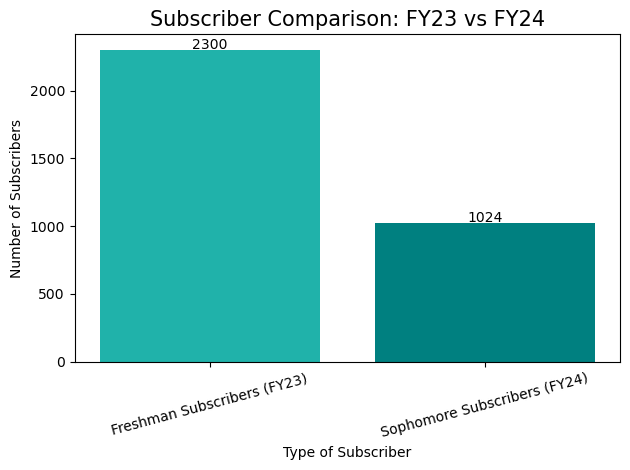

In [48]:
# Data
labels = ['Freshman Subscribers (FY23)', 'Sophomore Subscribers (FY24)']
values = [freshman23, sophomore24]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=10)

plt.tight_layout()
plt.show()

In [50]:
# for 2 year subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
filtered3 = df23[df23['price_code_type'].str.startswith('Fixed Sophomore Subscription', na=False)]
sophomore23 = np.sum(filtered3.groupby('price_code_type')['ticket_type'].count())
sophomore23

1015

In [52]:
filtered3['acct_id']

1        8449640
13       4721140
14       7603871
16        100532
17        100532
          ...   
28525    7648541
28545     120156
28546    7097717
28588    7595688
28590    7011083
Name: acct_id, Length: 1015, dtype: int64

In [55]:
# for three+ year subscribers in FY24 - to compare with second year subscribers in FY23
# I'm not sure if you can compare with just second year subscribers, since it's 3+ years but
df24 = df[df['fiscal_year'] =='FY24']
filtered4 = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
established24 = np.sum(filtered4.groupby('price_code_type')['ticket_type'].count())
established24 #8410 established subscribers in FY24

count_match = filtered4['acct_id'].isin(filtered3['acct_id']).sum()
print(count_match)

644


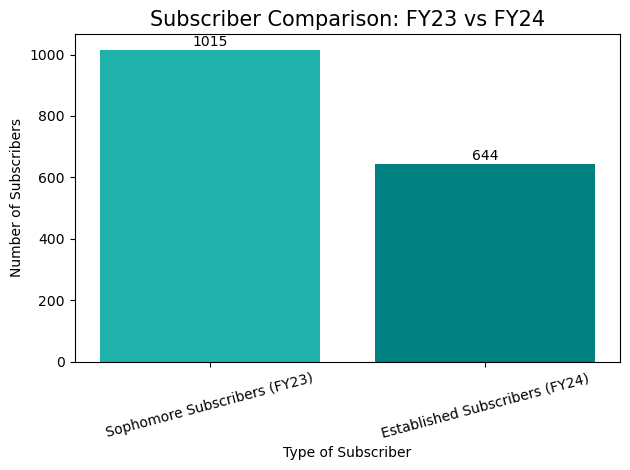

In [61]:
# Data
labels = ['Sophomore Subscribers (FY23)', 'Established Subscribers (FY24)']
values = [sophomore23, count_match]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
# count of CYO subscribers in FY23
df23 = df[df['fiscal_year'] =='FY23']
CYO23 = df23[df23['price_code_type'] == 'CYO Subscription']['ticket_type'].count()
print('CYO Subscribers in FY23: ' + str(CYO23))

# for upgraded subscribers in FY24 - to compare with CYO subscribers in FY23
df24 = df[df['fiscal_year'] =='FY24']
filtered = df24[df24['price_code_type'].str.startswith('Fixed Upgrade Subscription', na=False)]
upgrade24 = np.sum(filtered.groupby('price_code_type')['ticket_type'].count())
print('Upgraded subscriptions in FY24: ' + str(upgrade24))

print('Rate of coming back from CYO in FY23 to Upgraded in FY24: ' + str(upgrade24 / CYO23 * 100))

CYO Subscribers in FY23: 2537
Upgraded subscriptions in FY24: 446
Rate of coming back from CYO in FY23 to Upgraded in FY24: 17.57981868348443


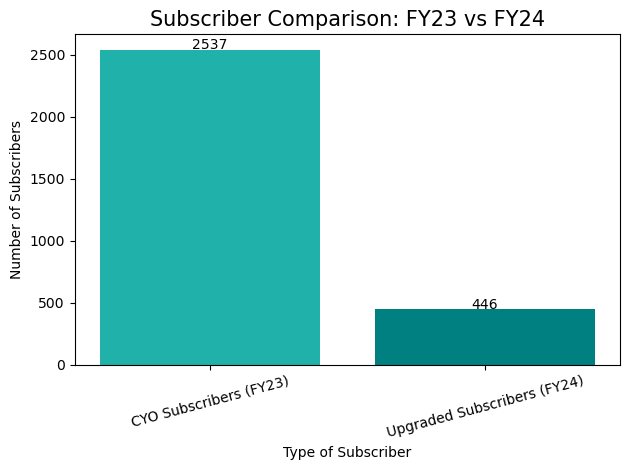

In [21]:
# Data
labels = ['CYO Subscribers (FY23)', 'Upgraded Subscribers (FY24)']
values = [CYO23, upgrade24]

# Plot
plt.bar(labels, values, color=['lightseagreen', 'teal'])
plt.title('Subscriber Comparison: FY23 vs FY24', fontsize = 15)
plt.xlabel('Type of Subscriber')
plt.ylabel('Number of Subscribers')
plt.xticks(rotation=15)

# Add value labels on top of bars
for i, value in enumerate(values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=10)

plt.tight_layout()
plt.show()

## Relationship between discount rate and demand (how successfully discount rate is working on inducing demand, which group?)

In [25]:
# Main characteristics of the people who just became Established in 2024, (age, educ, average number of attendance) 
df_establish = df24[df24['price_code_type'].str.startswith('Fixed Established Subscription', na=False)]
df_establish['age'].describe()

count    8135.000000
mean       67.209588
std        15.940083
min        20.000000
25%        56.000000
50%        70.000000
75%        78.000000
max        99.000000
Name: age, dtype: float64

In [36]:
import matplotlib.pyplot as plt

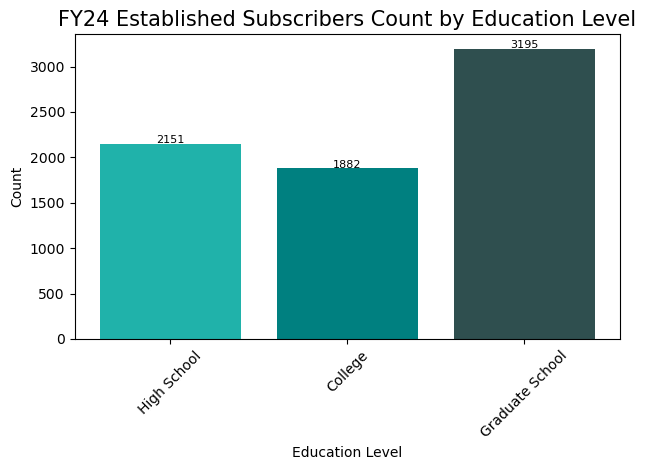

In [27]:
edu_counts = df_establish.groupby('education')['ticket_type'].count()

order = ['High School', 'College', 'Graduate School']
edu_counts = edu_counts.reindex(order)

plt.bar(edu_counts.index, edu_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 Established Subscribers Count by Education Level', fontsize = 15)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(edu_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='center_baseline', fontsize=8)

plt.tight_layout()
plt.show()

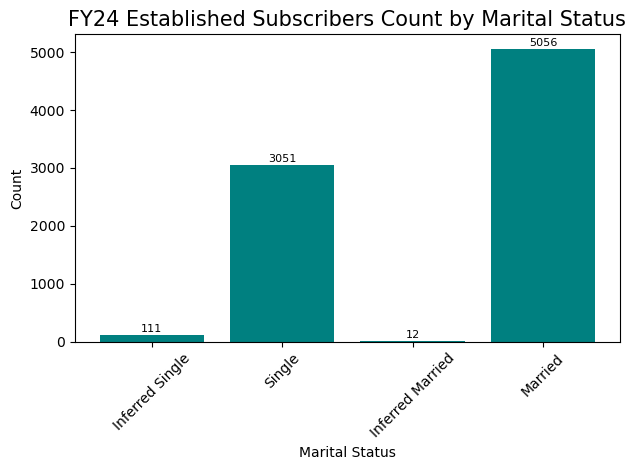

In [28]:
marital_counts = df_establish.groupby('marital_status')['ticket_type'].count()

order = ['Inferred Single', 'Single', 'Inferred Married', 'Married']
marital_counts = marital_counts.reindex(order)

plt.bar(marital_counts.index, marital_counts.values, color='teal')
plt.title('FY24 Established Subscribers Count by Marital Status', fontsize = 15)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(marital_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()

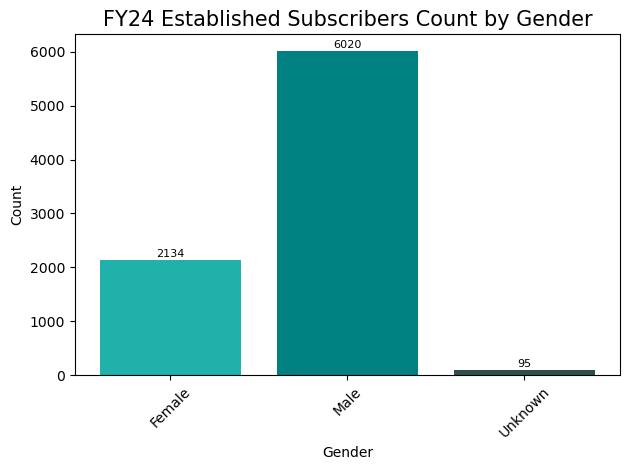

In [29]:
gender_counts = df_establish.groupby('gender')['ticket_type'].count()

plt.bar(gender_counts.index, gender_counts.values, color=['lightseagreen', 'teal', 'darkslategray'])
plt.title('FY24 Established Subscribers Count by Gender', fontsize = 15)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, value in enumerate(gender_counts.values):
    plt.text(i, value + 50, str(value), ha='center', va='baseline', fontsize=8)
plt.tight_layout()
plt.show()